<a href="https://colab.research.google.com/github/fabiodemo/Deep-Learning-CV-CNN-TL/blob/main/assignment_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: Fashion MNIST
Now it is your turn! You are going to use the same methods presented in the previous video in order to classify clothes from a black and white dataset of images (image by Zalando, MIT License):
![](https://tensorflow.org/images/fashion-mnist-sprite.png)

The class labels are:
```
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot
```

### 1. Preparing the input data
Let's first import the dataset. It is available on [tensorflow.keras.datasets](https://keras.io/datasets/):

In [ ]:
import tensorflow
fashion_mnist = tensorflow.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
print("Shape of the training set: {}".format(X_train.shape))
print("Shape of the test set: {}".format(X_test.shape))

Shape of the training set: (60000, 28, 28)
Shape of the test set: (10000, 28, 28)


In [ ]:
# TODO: Normalize the training and testing set using standardization
def normalize(x,m,s):
    return ((x - m)/s)

train_mean = X_train.mean()
train_std = X_train.std()

X_train = normalize(X_train, train_mean, train_std)
X_test = normalize(X_test, train_mean, train_std)


In [ ]:
print(f'Training Mean after standardization {X_train.mean():.3f}')
print(f'Training Std after standardization {X_train.std():.3f}')
print(f'Test Mean after standardization {X_test.mean():.3f}')
print(f'Test Std after standardization {X_test.std():.3f}')

Training Mean after standardization -0.000
Training Std after standardization 1.000
Test Mean after standardization 0.002
Test Std after standardization 0.998


### 2. Training with fully connected layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4544 - accuracy: 0.8360 - val_loss: 0.4006 - val_accuracy: 0.8568
Epoch 2/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3475 - accuracy: 0.8714 - val_loss: 0.3592 - val_accuracy: 0.8695


### 3. Extending to CNNs
Now your goal is to develop an architecture that can reach a test accuracy higher than 0.85.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# TODO: Reshape the dataset in order to add the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(8,
        input_shape=(28, 28, 1),
        kernel_size=3, activation='relu'
        ),
    MaxPooling2D(),
    Conv2D(16, 
           kernel_size=3,
          activation='relu'
        ),
    MaxPooling2D(),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 400)               0         
                                                                 
 dense_40 (Dense)            (None, 32)              

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5177 - accuracy: 0.8152 - val_loss: 0.3996 - val_accuracy: 0.8523
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3657 - accuracy: 0.8687 - val_loss: 0.3646 - val_accuracy: 0.8681
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3264 - accuracy: 0.8819 - val_loss: 0.3526 - val_accuracy: 0.8698
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3030 - accuracy: 0.8910 - val_loss: 0.3433 - val_accuracy: 0.8759
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2848 - accuracy: 0.8963 - val_loss: 0.3192 - val_accuracy: 0.8842


### 4. Visualizing Predictions

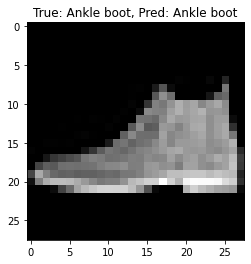

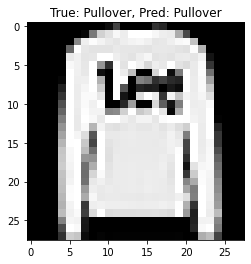

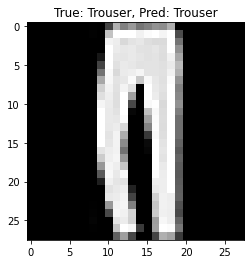

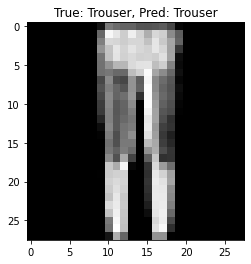

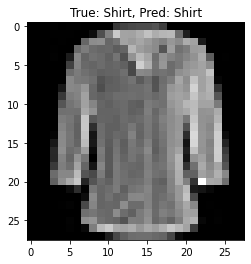

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

label_names = {0:"T-shirt/top",
               1:"Trouser",
               2:"Pullover",
               3:"Dress",
               4:"Coat",
               5:"Sandal",
               6:"Shirt",
               7:"Sneaker",
               8:"Bag",
               9:"Ankle boot"}

# Index to be visualized
for idx in range(5):
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    out = model.predict(X_test[idx].reshape(1,28,28,1))
    plt.title("True: {}, Pred: {}".format(label_names[y_test[idx]], label_names[np.argmax(out)]))
    plt.show()